In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("Job_Placement_Data.csv")

In [5]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
df.shape

(215, 13)

In [8]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


PREPROCESSING STEPS

In [9]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

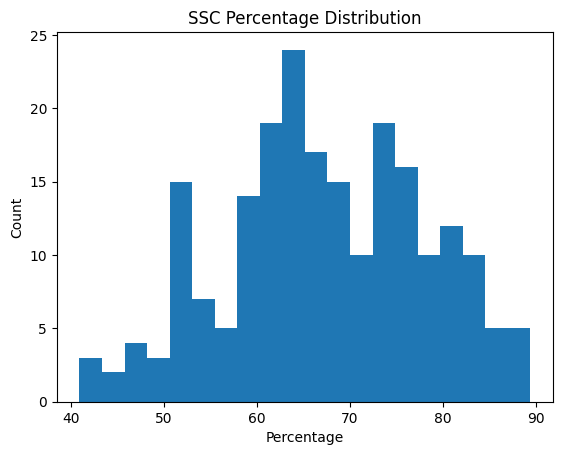

In [12]:
plt.hist(df['ssc_percentage'],bins=20)
plt.title("SSC Percentage Distribution")
plt.xlabel("Percentage")
plt.ylabel('Count')
plt.show()

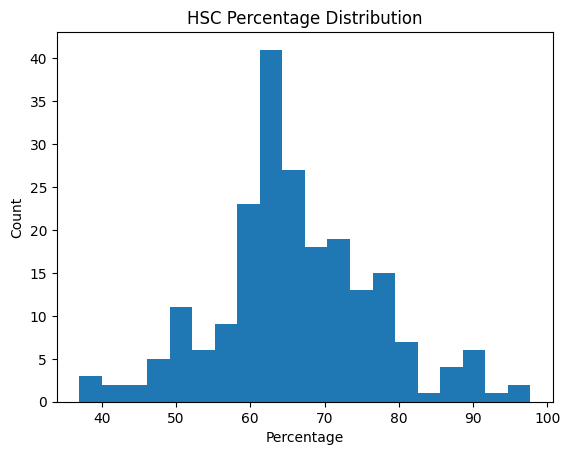

In [16]:
plt.hist(df['hsc_percentage'],bins=20)
plt.title("HSC Percentage Distribution")
plt.xlabel("Percentage")
plt.ylabel('Count')
plt.show()

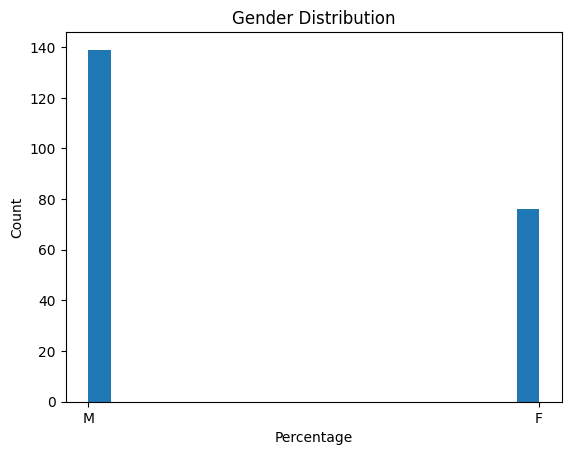

In [17]:
plt.hist(df['gender'],bins=20)
plt.title("Gender Distribution")
plt.xlabel("Percentage")
plt.ylabel('Count')
plt.show()

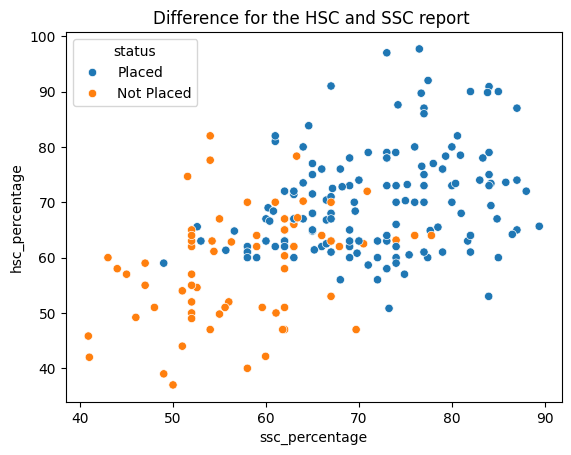

In [23]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Difference for the HSC and SSC report ")

plt.show()

In [22]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [24]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [25]:
# convert the categorical value into the numeraical value.

pd.get_dummies(df,columns=['gender','ssc_board','hsc_board',
       'hsc_subject', 'undergrad_degree',
       'work_experience','specialisation',
       'status'],drop_first=True)

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,True,False,False,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,True,True,True,True,False,False,False,False,False,True
211,58.00,60.00,72.00,74.0,53.62,True,True,True,False,True,False,True,False,False,True
212,67.00,67.00,73.00,59.0,69.72,True,True,True,True,False,False,False,True,False,True
213,74.00,66.00,58.00,70.0,60.23,False,True,True,True,False,False,False,False,True,True


In [26]:
X=df.drop('status',axis=1)
y=df['status']

In [ ]:

y.shape

(215,)

In [28]:
X.shape

(215, 12)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train.shape

(172, 12)

In [32]:
X_test.shape

(43, 12)

In [33]:
# train models
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [36]:
df = pd.get_dummies(df, columns=['gender','ssc_board','hsc_board',
       'hsc_subject', 'undergrad_degree',
       'work_experience','specialisation',
       'status'], drop_first=True)

# Convert booleans to integers
df = df.astype(int)


In [37]:
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
y_pred

ValueError: could not convert string to float: 'M'

In [38]:
# 1) One-hot encode
df = pd.get_dummies(df, columns=[
    'gender','ssc_board','hsc_board','hsc_subject',
    'undergrad_degree','work_experience',
    'specialisation','status'
], drop_first=True)

# 2) Convert everything to numbers
df = df.apply(pd.to_numeric, errors='coerce')

# 3) Remove rows with missing values caused by conversion
df = df.dropna()

# 4) Check — should show ONLY int/float columns
print(df.dtypes)


KeyError: "None of [Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',\n       'work_experience', 'specialisation', 'status'],\n      dtype='object')] are in the [columns]"

In [39]:
print(df.columns.tolist())



['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent', 'gender_M', 'ssc_board_Others', 'hsc_board_Others', 'hsc_subject_Commerce', 'hsc_subject_Science', 'undergrad_degree_Others', 'undergrad_degree_Sci&Tech', 'work_experience_Yes', 'specialisation_Mkt&HR', 'status_Placed']


In [40]:
X = df.drop('status_Placed', axis=1)
y = df['status_Placed']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.8837209302325582


In [44]:
# Example feature values
input_data = (
    80,   # ssc_percentage
    75,   # hsc_percentage
    68,   # degree_percentage
    85,   # emp_test_percentage
    70,   # mba_percent
    1,    # gender_M (1=Male, 0=Female)
    0,    # ssc_board_Others
    1,    # hsc_board_Others
    0,    # hsc_subject_Commerce
    1,    # hsc_subject_Science
    0,    # undergrad_degree_Others
    1,    # undergrad_degree_Sci&Tech
    1,    # work_experience_Yes
    1     # specialisation_Mkt&HR
)

# Convert to numpy array
np_array = np.asarray(input_data)

# Reshape
reshaped_array = np_array.reshape(1, -1)

# Scale (IMPORTANT)
reshaped_array = scaler.transform(reshaped_array)

# Predict
prediction = model.predict(reshaped_array)

if prediction[0] == 1:
    print("Person is placed")
else:
    print("Person is not placed")


Person is placed


C:\Users\Kirat\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
import pickle

# after training:
pickle.dump(model, open('placement.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))   # IMPORTANT if you used StandardScaler


In [47]:
scaler = StandardScaler()
